Supervised Learning: A deep-dive into PCOS
==========================================

Polycystic Ovary Syndrome (PCOS) is a complex endocrine disorder affecting women of reproductive age worldwide. 

The following are some key facts about PCOS according to [The World Health Organization](https://www.who.int/news-room/fact-sheets/detail/polycystic-ovary-syndrome):

<b>Prevalence:</b> PCOS affects approximately 8-13% of women of reproductive age in the United States, according to the Centers for Disease Control and Prevention (CDC), but the condition is woefully underdiagnosed, so the actual number is likely higher.

<b>Cause:</b> The exact cause of PCOS is unknown, but it is believed to involve a combination of genetic and environmental factors. Insulin resistance, increased levels of male hormones (androgens), and inflammation have been linked to PCOS.

<b>Diagnosis:</b> There is no single test to diagnose PCOS. Diagnosis is typically based on a combination of clinical signs and symptoms, blood tests to measure hormone levels, and imaging studies like ultrasound to look at the ovaries.

<b>Associated Health Risks:</b> Women with PCOS are at an increased risk for several other health conditions, including type 2 diabetes, cardiovascular disease, obesity, and mental health disorders such as depression and anxiety. They are also at a higher risk for endometrial cancer.

<b>Fertility:</b> PCOS is one of the leading causes of infertility due to the ovulatory dysfunction it can cause. However, many women with PCOS can conceive with the appropriate medical treatment and lifestyle changes.

<b>Insulin Resistance:</b> A significant number of women with PCOS have insulin resistance, which means their bodies can't use insulin effectively. This can lead to high blood sugar levels and increase the risk of developing diabetes.


<i>In the following notebook, I will conduct exploratory data analysis (EDA) and apply supervised learning techniques to uncover insights about this syndrome.</i>

<h3>Import Packages</h3>

First, I will import the packages I need for this analysis:

In [41]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import pandoc as pandoc

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from yellowbrick.model_selection import RFECV

<h3>Exploratory Data Analysis</h3>

Let's read in & check out the first few rows of the data

In [22]:
pcos_df = pd.read_csv("PCOS_data.csv")

pcos_df.head().T

,0,1,2,3,4
Sl. No,1,2,3,4,5
Patient File No.,1,2,3,4,5
PCOS (Y/N),0,0,1,0,0
Age (yrs),28,36,33,37,25
Weight (Kg),44.6,65.0,68.8,65.0,52.0
Height(Cm),152.0,161.5,165.0,148.0,161.0
BMI,19.3,#NAME?,#NAME?,#NAME?,#NAME?
Blood Group,15,15,11,13,11
Pulse rate(bpm),78,74,72,72,72
RR (breaths/min),22,20,18,20,18


As you can see, in row 7, the BMI calculations seem to have an error. Since that calculation is known and readily available online, I will use the following formula to fix that column:

$$(weight(kg)) \over (height(m)^2)$$

Also, the last feature seems to be there in error, and the first two features seems to be unnecessary to analysis. I will remove those three features from the dataframe. I will also remove FSH/LH because we have FSH & LH as their own features already.

In [23]:
# Calculating BMI to replace values in BMI column
pcos_df['BMI'] = (pcos_df['Weight (Kg)'] / ((pcos_df['Height(Cm) '] / 100) ** 2)).round(2)
# Delete unnecessary features
pcos_df = pcos_df.drop(['Sl. No', 'Patient File No.', 'FSH/LH', 'Unnamed: 44'], axis = 'columns')
# Showed transposed data
pcos_df.head().T

,0,1,2,3,4
PCOS (Y/N),0.00,0.00,1.00,0.00,0.00
Age (yrs),28.00,36.00,33.00,37.00,25.00
Weight (Kg),44.60,65.00,68.80,65.00,52.00
Height(Cm),152.00,161.50,165.00,148.00,161.00
BMI,19.30,24.92,25.27,29.67,20.06
Blood Group,15.00,15.00,11.00,13.00,11.00
Pulse rate(bpm),78.00,74.00,72.00,72.00,72.00
RR (breaths/min),22.00,20.00,18.00,20.00,18.00
Hb(g/dl),10.48,11.70,11.80,12.00,10.00
Cycle(R/I),2.00,2.00,2.00,2.00,2.00


Now that the BMI values are calculated & a couple features have been cleaned up, I'm going to do some general, nitpicky cleanup to remove unecessary spaces and some mispellings.

In [24]:
pcos_df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)',
       'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [25]:
pcos_df = pcos_df.rename(columns={' Age (yrs)': 'Age(yrs)', 'Weight (Kg)':'Weight(Kg)', 'Height(Cm) ': 'Height(Cm)', 
                   'Pulse rate(bpm) ': 'Pulse rate(bpm)', 'PCOS (Y/N)': 'PCOS', 'RR (breaths/min':'RR(breaths/min',
                  'Marraige Status (Yrs)':'Marriage Status(Yrs)', 'No. of aborptions':'No. of abortions',
                  'Skin darkening (Y/N)': 'Skin darkening(Y/N)', 'Fast food (Y/N)':'Fast food(Y/N)',
                  'BP _Systolic (mmHg)':'BP_Systolic(mmHg)', 'BP _Diastolic (mmHg)':'BP_Diastolic(mmHg)'})


Let's check to see if we have any nulls.

In [26]:
pcos_df.isnull().sum()

PCOS                      0
Age(yrs)                  0
Weight(Kg)                0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marriage Status(Yrs)      1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening(Y/N)       0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food(Y/N)            1
Reg.Exercise(Y/N)         0
BP_Systolic(mmHg)         0
BP_Diastolic(mmHg)  

You can see that there are null values in both the 'Marriage Status(Yrs)' & 'Fast food(Y/N)' columns. Since years in an integer, I will impute the missing value with the <code>average</code> of the others. Since 'Fast food(Y/N)' has 0 or 1 as the value, I will impute the missing value with the <code>mode</code>. Hardcoding the imputation is not the best method but it works here because I had very few imputations to make. 

In [27]:
# Calculating mean for marriage status
mean_marr = pcos_df['Marriage Status(Yrs)'].mean()
# Calculating mode for marriage status
mode_ff = pcos_df['Fast food(Y/N)'].mode()

print("Mean Years of Marriage: %s" % (mean_marr))
print("Mode of Fast Food (Y/N): %s" % (mode_ff), '\n')

# Imputing these values into the missing NA
pcos_df['Marriage Status(Yrs)'] = pcos_df['Marriage Status(Yrs)'].fillna(7.68)
pcos_df['Fast food(Y/N)'] = pcos_df['Fast food(Y/N)'].fillna(1)

# Observing what the mean is for marriage status & fast food now that they are imputed
print(pcos_df[['Marriage Status(Yrs)','Fast food(Y/N)']].describe().T)

Mean Years of Marriage: 7.6809259259259255
Mode of Fast Food (Y/N): 0    1.0
Name: Fast food(Y/N), dtype: float64 

                      count      mean       std  min  25%  50%   75%   max
Marriage Status(Yrs)  541.0  7.680924  4.799385  0.0  4.0  7.0  10.0  30.0
Fast food(Y/N)        541.0  0.515712  0.500216  0.0  0.0  1.0   1.0   1.0


---------
Now that we've done a bit of observation & cleanup, let's see if we can perform Recursive Feature Elimination using Cross-Validation


<h3>Feature Selection</h3>

Below, I will perform k-fold cross-validation for recursive feature selection. I will feed the cross-validator with all the features we have at the moment. This proved to be a long process and I kept getting the error that my data was not converging. I first increased the <code>max_iter</code> but soon learned that it might be wiser to scale the data and try again. 

<h4>Scaling the data:</h4>

In [28]:
X = pcos_df.drop('PCOS', axis = 1)
y = pcos_df['PCOS']

# Scale X to help with processing time and to solve the convergence issue
scale = StandardScaler()
scaledX = scale.fit_transform(X)

scaledX

array([[-0.63460643, -1.36476953, -0.74400482, ...,  0.83677604,
         0.76853707,  0.01113306],
       [ 0.84523012,  0.48673106,  0.83198292, ..., -0.00508332,
        -0.43781578, -2.20761818],
       [ 0.29029141,  0.83161842,  1.41260999, ...,  0.83677604,
         1.3717135 ,  0.70449282],
       ...,
       [ 0.84523012, -0.5116271 , -0.74400482, ...,  0.83677604,
        -1.94575684, -0.54355475],
       [-0.819586  , -0.87466643, -1.07579171, ...,  0.83677604,
         0.16536065,  1.39785259],
       [-1.55950427,  2.02964822,  1.41260999, ...,  1.11739583,
         0.76853707, -0.72845069]])

By scaling the data, we are able to run the RFECV process more efficiently.

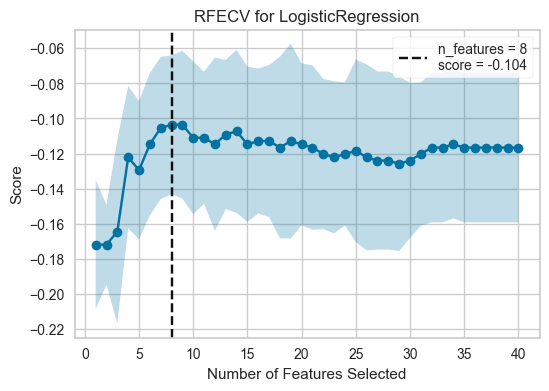

<Axes: title={'center': 'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [29]:
model = LogisticRegression(max_iter = 10000) # define model process
model.fit(scaledX, y) # fit the model to the scaled X

plt.figure(figsize = [6,4])

visualizer = RFECV(model, step = 1, cv = 5, scoring='neg_mean_squared_error')
visualizer.fit(scaledX, y)
visualizer.show()

Now that we have the scoring of the cross-validation model & the recommended number of features, let's map those features back to the original dataset and create a new dataset with just the relevant features. 

In [30]:
feature_mask = visualizer.support_ #output T/F array 
feature_columns = pcos_df.drop('PCOS', axis=1).columns  # Exclude target variable column if it's in the DataFrame
selected_features = feature_columns[feature_mask] #outputs selected features according to feature_mask
print(selected_features)

# define new df with selected features
pcos_df_sf = pcos_df[['PCOS', 'Cycle(R/I)', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening(Y/N)', 'Pimples(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)']]

Index(['Cycle(R/I)', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening(Y/N)', 'Pimples(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)'],
      dtype='object')


Create correlation matrix to create a heatmap to visualize relationships.

<Axes: >

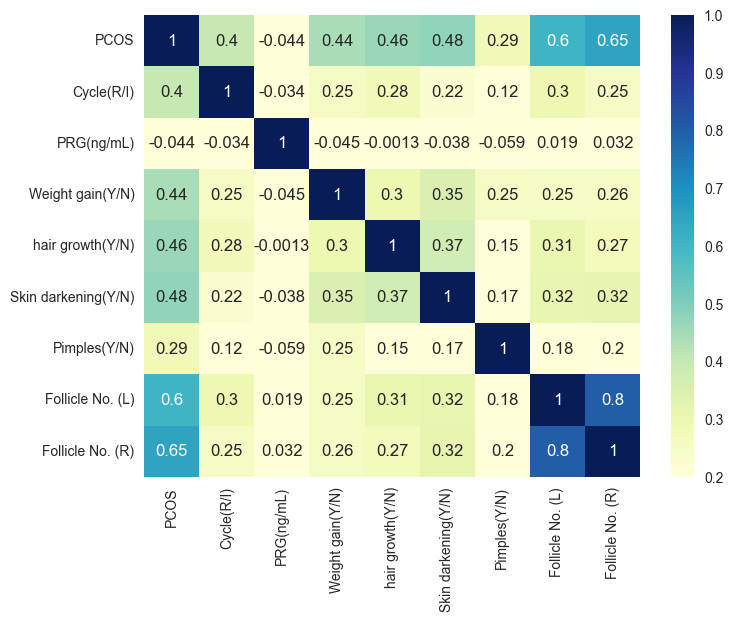

In [31]:
corr_matrix = pcos_df_sf.corr() #define correlation matrix with relevant features only

plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin=0.2, cmap='YlGnBu', annot = True)

Here is the list of correlation values of the variables & the presence of PCOS:

In [32]:
corr_values = corr_matrix["PCOS"].sort_values(ascending=False)
corr_values

PCOS                   1.000000
Follicle No. (R)       0.648327
Follicle No. (L)       0.603346
Skin darkening(Y/N)    0.475733
hair growth(Y/N)       0.464667
Weight gain(Y/N)       0.441047
Cycle(R/I)             0.401644
Pimples(Y/N)           0.286077
PRG(ng/mL)            -0.043834
Name: PCOS, dtype: float64

<h3>Model Performance</h3>

I'm now going to test the model performance using the pared-down dataset that I got from using the Feature Selection with Cross-Validation technique.

In [33]:
X = pcos_df_sf.drop('PCOS', axis = 1) #feature columns in new df
y = pcos_df_sf['PCOS'] #target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) #make train test split

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Perform cross-validation and print the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print("Logistic Regression Accuracy: %0.2f" % (cv_scores.mean()))

Logistic Regression Accuracy: 0.91


Pretty good performance with a prediction accuracy of 0.91.

<h4>Tune Hyperparameters</h4>

Let's try a GridSearch to find the best hyperparameters in an attempt to improve our model.

In [34]:
# Define the parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'penalty': ['l1', 'l2']
}

# Initialize the grid search for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), param_grid_lr, cv=10)

# Fit on your training data
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best CV score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l1'}
Best CV score for Logistic Regression: 0.9121035940803383


Now we want to fit a model based on our "best" hyperparameters.

In [40]:
# Initialize the Logistic Regression model with the best parameters
final_model_lr = LogisticRegression(C=grid_search_lr.best_params_['C'], penalty=grid_search_lr.best_params_['penalty'], max_iter=1000, solver='liblinear')
final_model_lr.fit(X_train, y_train)

# Final validation with CV
final_cv_scores_lr = cross_val_score(final_model_lr, X_train, y_train, cv=10)

print("Final Logistic Regression CV Accuracy: %0.2f" % (final_cv_scores_lr.mean()))

Final Logistic Regression CV Accuracy: 0.88


Although the hyperparameter selection didn't improve our model performance in a significant way, it is a good function to perform in general in trying to build the best model. 

Below is an ROC-curve that shows the relationship between the true positive rate and the false positive rate. 

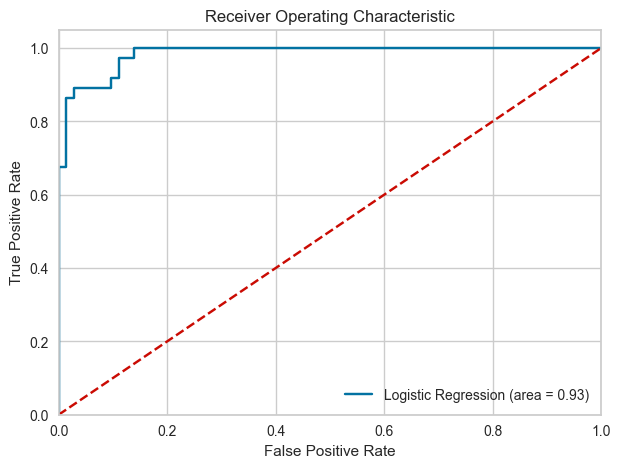

In [36]:
logit_roc_auc = roc_auc_score(y_test, final_model_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, final_model_lr.predict_proba(X_test)[:,1])

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Just out of curiosity, I wanted to see what the accuracy scores were for individual features in predicting the presence of PCOS.

In [37]:
features = ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening(Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 
            'Pimples(Y/N)', 'PRG(ng/mL)'         
       ]

for feature in features:
    pcos_test = pcos_df_sf[['PCOS', feature]]
    #print(pcos_test)
    
    X = pcos_test.drop('PCOS', axis = 1) #feature columns in new df
    y = pcos_test['PCOS'] #target column
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) #make train test split
    
    # Initialize Logistic Regression model
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(X_train, y_train)

    # Perform cross-validation and print the scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print("LogReg Accuracy for Single Feature", feature, ": %0.2f" % (cv_scores.mean()))

LogReg Accuracy for Single Feature Follicle No. (R) : 0.83
LogReg Accuracy for Single Feature Follicle No. (L) : 0.80
LogReg Accuracy for Single Feature Skin darkening(Y/N) : 0.77
LogReg Accuracy for Single Feature hair growth(Y/N) : 0.78
LogReg Accuracy for Single Feature Weight gain(Y/N) : 0.74
LogReg Accuracy for Single Feature Cycle(R/I) : 0.75
LogReg Accuracy for Single Feature Pimples(Y/N) : 0.68
LogReg Accuracy for Single Feature PRG(ng/mL) : 0.68


In [38]:
pcos_test = pcos_df_sf[['PCOS', 'Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening(Y/N)',]]
    
X = pcos_test.drop('PCOS', axis = 1) #feature columns in new df
y = pcos_test['PCOS'] #target column
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) #make train test split
    
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Perform cross-validation and print the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print("LogReg Accuracy for Single Feature", feature, ": %0.2f" % (cv_scores.mean()))

LogReg Accuracy for Single Feature PRG(ng/mL) : 0.88


<h3>Conclusion</h3>

In this notebook, I explored data associated with Polycystic Ovary Syndrome (PCOS). The objectives were to leverage machine learning to identify key factors that may contribute to PCOS and to develop a predictive model that can accurately classify individuals based on their risk of having PCOS.

<h4>Key Findings:</h4>

<h5>Feature Selection: </h5> Through Recursive Feature Elimination with Cross-Validation (RFECV), I identified the most significant features that impact the presence of PCOS. Notably, factors such as PRG (Progesterone) levels, menstrual cycle irregularity, and notable weight gain. Amongst others, those were deemed critical in understanding PCOS.

<h5>Model Performance:</h5> I chose the logistic regression model to analyze this dataset as we were trying to predict the presence of PCOS in the binary manner (1 or 0). The model's accuracy <code>(0.91)</code> demonstrated good performance in classifying PCOS. 

<h5>Clinical Insights:</h5> Our analysis showed the multifaceted nature of PCOS and emphasized the importance of a holistic approach to diagnosis and treatment. The hormone PRG (Progesterone) emerged as a significant marker, aligning with medical literature on its role in reproductive health.

<h4>Implications in Practice:</h4>
The findings from this analysis have implications for clinical practice, particularly in improving the chances of early detection of PCOS. By integrating the predictive model into clinical workflows, healthcare providers can identify at-risk individuals more efficiently, enabling timely intervention and management. I also believe by running the model with only certain features can streamline the diagnosis process. I.e. you may be able to avoid costly blood tests if you can get a 0.88 accuracy score from the top three identifying features (Follicle No. (R), Follicle No. (L)., and Skin Darkening).

<h4>Closing Remarks:</h4>
This notebook not only highlights the power of machine learning in medical research but may also pave the way for more personalized and data-driven approaches to healthcare. By continuing to bridge the gap between data science and medicine, we can unlock new frontiers in the diagnosis, treatment, and understanding of complex & under-diagnosed conditions like PCOS.